In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import pylab

In [2]:
modes = [
    {'mode': 'Tonic Spiking (TS)', 'a': 0.02, 'b': 0.2, 'c':-65, 'd': 6},
    {'mode': 'Phasic Spiking (PS)', 'a': 0.02, 'b': 0.25, 'c':-65, 'd': 6}, 
    {'mode': 'Chattering (C)', 'a': 0.02, 'b': 0.2, 'c':-50, 'd': 2},
    {'mode': 'Fast Spiking (FS)', 'a': 0.1, 'b': 0.2, 'c':-65, 'd': 2},
]

loc = [
    {'j': 0, 'k': 0},
    {'j': 0, 'k': 1},
    {'j': 1, 'k': 0},
    {'j': 1, 'k': 1},
]

I = 5

h = 0.1
t_0 = 0
t_n = 100

In [3]:
def f(t, w):
    v, u = w[0], w[1]
    v_new = 0.04*v**2 + 5*v + 140 - u + I
    u_new = a*(b*v - u)
    w_new = np.asarray([v_new, u_new])
    return w_new

In [4]:
def euler(x_0, t_n, f, h):
    m = int((t_n - t_0) / h)
    w = np.zeros(shape = (m + 1, len(x_0)))
    t = np.linspace(t_0, t_n, m + 1)
    w[0] = x_0
    for i in range(m):
        if w[i][0] >= 30:
            w[i][0] = c
            w[i][1] += d
        w[i + 1] = w[i] + h*f(t[i], w[i])
    return t, w

In [5]:
def runge_kutta(x_0, t_n, f, h):
    m = int((t_n - t_0) / h)
    w = np.zeros(shape = (m + 1, len(x_0)))
    k1 = k2 = k3 = k4 = np.zeros(shape = (1, len(x_0)))
    t = np.linspace(t_0, t_n, m + 1)
    w[0] = x_0
    for i in range(m):
        if w[i][0] >= 30:
            w[i][0] = c
            w[i][1] += d
        k1 = h*f(t[i], w[i])
        k2 = h*f(t[i] + h/2., w[i] + k1/2.)
        k3 = h*f(t[i] + h/2., w[i] + k2/2.)
        k4 = h*f(t[i] + h, w[i] + k3)
        w[i + 1] = w[i] + (k1 + 2*k2 + 2*k3 + k4)/6.
    return t, w

In [6]:
def implicit_euler(x_0, t_n, f, h):
    m = int((t_n - t_0) / h)
    w = np.zeros(shape = (m + 1, len(x_0)))
    t = np.linspace(t_0, t_n, m + 1)
    w[0] = x_0
    for i in range(m): 
        if w[i][0] >= 30:
            w[i][0] = c
            w[i][1] += d
        cur_w = w[i]
        def func(x):
            return x - cur_w - h*f(t[i], x)
        sol = root(func, cur_w)
        w[i + 1] = sol.x
    return t, w

In [7]:
def get_v(n, euler, kutta, imp):
    v = np.zeros(shape = (3, n))
    for i in range(n):
        v[0][i] = euler[i][0]
        v[1][i] = kutta[i][0]
        v[2][i] = imp[i][0]
    return v

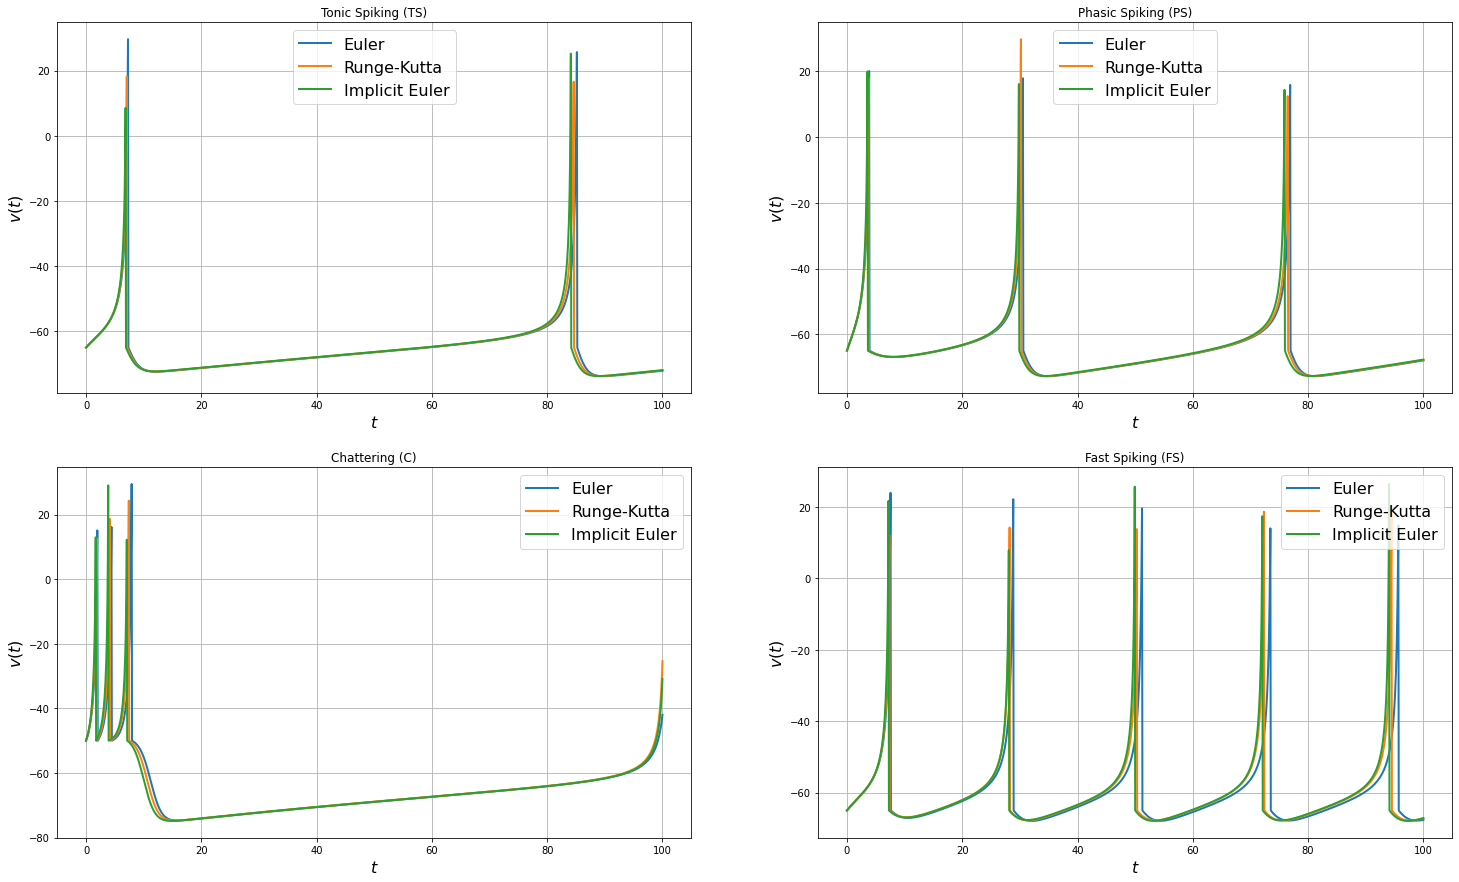

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
for i in range(4):
    mode_name, a, b, c, d = modes[i].values()                      # коэффиценты режима
    j, k = loc[i].values()                                         # расположение графика
    x_0 = np.asarray([c, b*c])                                     # начальные условия
    
    t_euler, w_euler = euler(x_0, t_n, f, h)                       # метод Эйлера
    t_kutta, w_kutta = runge_kutta(x_0, t_n, f, h)                 # метод Рунге-кутта
    t_imp, w_imp = implicit_euler(x_0, t_n, f, h)                  # неявный метод Эйлера
    
    v = get_v(len(t_euler), w_euler, w_kutta, w_imp)               # получение значений v
    
    axs[j, k].set_title(mode_name)
    axs[j, k].plot(t_euler, v[0], linewidth=2, label = r'Euler')
    axs[j, k].plot(t_kutta, v[1], linewidth=2, label = r'Runge-Kutta')
    axs[j, k].plot(t_imp, v[2], linewidth=2, label = r'Implicit Euler')
  
    axs[j, k].set_xlabel(r'$t$', fontsize=16)
    axs[j, k].set_ylabel(r'$v(t)$', fontsize=16)
    axs[j, k].legend(loc = 'best', fontsize=16)
    axs[j, k].grid()
    
pylab.savefig('odu.pdf', bbox_inches='tight')

In [12]:
exn=800
inn=200
h=0.5
end_time=1000.

a = np.hstack((0.02 * np.ones(exn), 0.02 + 0.08 * np.random.uniform(size=inn)))
b = np.hstack((0.2 * np.ones(exn), 0.25 - 0.05 * np.random.uniform(size=inn)))
c = np.hstack((-65. + 15. * np.random.uniform(size=exn) ** 2., -65. * np.ones(inn)))
d = np.hstack((8. - 6. * np.random.uniform(size=exn) ** 2., 2. * np.ones(inn)))

v = -65. * np.ones_like(a)
u = b * v

W = np.hstack((0.5 * np.random.uniform(size=(exn + inn, exn)), -np.random.uniform(size=(exn + inn, inn))))
w_exn = np.random.uniform(size=exn)
w_inn = np.random.uniform(size=inn)

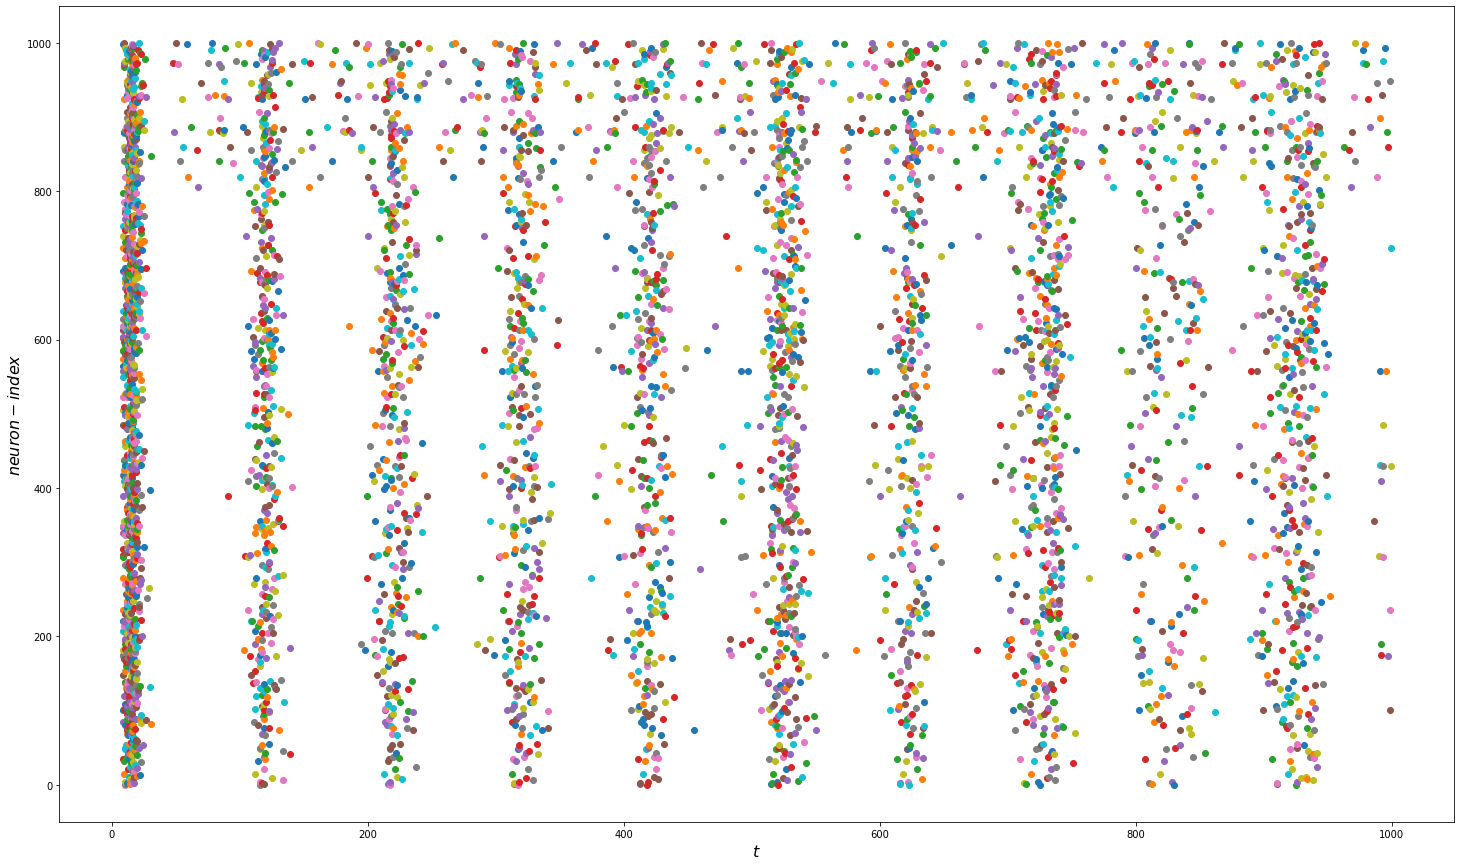

In [13]:
def euler_neuron(_I):
    v_new = v + h * (0.04 * v ** 2 + 5 * v + 140 - u + _I)
    u_new = u + h * (a * (b * v - u))
    return v_new, u_new
    
spikes_list = []
times = np.arange(end_time, step=h)

for t in times:
    imp = (v >= 30) # массив из элемнтов true/false, где true означает возникновение испульса
    v[imp] = c[imp] # изменение v, u нейронов, в которых возник импульс
    u[imp] += d[imp]
    spikes = np.where(imp)
    I = np.hstack((5 * w_exn, 2 * w_inn))
    I += np.sum(W[:, imp], axis=1)
    v, u = euler_neuron(I) 
    if len(spikes[0]) > 0: 
        spikes_list.append({'t': t, 'neuron-index' : spikes[0]}) # индексы нейронов, в которых возник импульс
    
    
fig, axs = plt.subplots(1, 1, figsize=(25, 15))
axs.set_xlabel(r'$t$', fontsize=16)
axs.set_ylabel(r'$neuron-index$', fontsize=16)

for t in spikes_list:
    for neuron_index in t['neuron-index']:
        axs.plot([t['t']], [neuron_index], 'o')
pylab.savefig('neuron4.pdf', bbox_inches='tight')